In [9]:
"""Analisis experimental de Insertion sort"""

from time import time
import itertools
import numpy as np
import pylab as pl
from __future__ import unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt


In [10]:
A = [1,2,3,4]
"""Permutaciones del arreglo, usadas para el cálculo del tiempo promedio"""
permutations = itertools.permutations(A)

In [11]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1       


In [202]:
"""Usado para medir los tiempos del mejor y el peor caso"""
sumtimes = 0
for times in range (1000):
    test = [1,2,3,4]
    
    init_time = time()
    
    insertion_sort(test)
    
    
    sumtimes+= time()-init_time

bestcase_n4 = sumtimes/1000.0  
    
print "best case, n=4", bestcase_n4




sumtimes = 0
for times in range (1000):
    test = [1,2,3,4,5]
    
    init_time = time()
    
    insertion_sort(test)
    
    
    sumtimes+= time()-init_time

bestcase_n5 = sumtimes/1000.0  
    
print "best case, n=5", bestcase_n5

sumtimes = 0
for times in range (1000):
    test = [1,2,3,4,5,6]
    
    init_time = time()
    
    insertion_sort(test)
    
    
    sumtimes+= time()-init_time

bestcase_n6 = sumtimes/1000.0  
    
print "best case, n=6", bestcase_n6

sumtimes = 0
for times in range (1000):
    test = [4,3,2,1]
    
    init_time = time()
    
    insertion_sort(test)
    
    
    sumtimes+= time()-init_time

worstcase_n4 = sumtimes/1000.0  
    
print "worst case, n=4", worstcase_n4




sumtimes = 0
for times in range (1000):
    test = [5,4,3,2,1]
    
    init_time = time()
    
    insertion_sort(test)
    
    
    sumtimes+= time()-init_time

worstcase_n5 = sumtimes/1000.0  
    
print "worst case, n=5", worstcase_n5

sumtimes = 0
for times in range (1000):
    test = [6,5,4,3,2,1]
    
    init_time = time()
    
    insertion_sort(test)
    
    sumtimes+= time()-init_time

worstcase_n6 = sumtimes/1000.0  
    
print "worst case, n=6", worstcase_n6





best case, n=4 2.42972373962e-06
best case, n=5 3.10182571411e-06
best case, n=6 3.821849823e-06
worst case, n=4 4.48322296143e-06
worst case, n=5 6.46567344666e-06
worst case, n=6 8.51655006409e-06


In [245]:
"""Calculamos el tiempo de todas las permutaciones del arreglo"""
import math
A = [1,2,3,4]
permutations = itertools.permutations(A)
print A
average_times = []
for tests in xrange(3):
    sumtimes = 0
    for p in permutations:
        
        the_list = []
        the_list.append(p)
        tuple_to_list= [x for xs in the_list for x in xs]
       
        initial_time = time()
        insertion_sort(tuple_to_list)    
        sumtimes += time()-initial_time
       
    average_times.append(sumtimes/math.factorial(tests+4))
    A.append(tests+5)
    permutations = itertools.permutations(A)

print average_times

[1, 2, 3, 4]
[3.1093756357828775e-06, 5.11010487874349e-06, 7.277064853244358e-06]


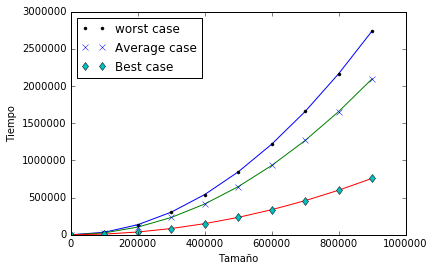

In [246]:
import sympy as sy

from matplotlib.pyplot import *


"""Polinomio para el mejor caso"""

x = np.array([4,5,6])
y_worst = np.array([4.48322296143e-06
, 6.46567344666e-06
, 8.51655006409e-06

])

y_best = np.array([2.42972373962e-06
,3.10182571411e-06
, 3.821849823e-06])

y_average = [3.1093756357828775e-06, 5.11010487874349e-06, 7.277064853244358e-06]

z_best = np.polyfit(x, y_best, 2)
z_average = np.polyfit(x, y_average, 2)
z_worst = np.polyfit(x, y_worst, 2)



def best_case(x):
    return ((z_best[0]*(x-5)*(x-6))+(z_best[1]*(x-4)*(x-6))+(z_best[1]*(x-4)*(x-5)))

def p_average(x):
    return ((z_average[0]*(x-5)*(x-6))+(z_average[1]*(x-4)*(x-6))+(z_average[1]*(x-4)*(x-5)))

def p_worst(x):
    return ((z_worst[0]*(x-5)*(x-6))+(z_worst[1]*(x-4)*(x-6))+(z_worst[1]*(x-4)*(x-5)))


ns = np.arange(1,10**6,10**5)
pl.ylabel("Tiempo")
pl.xlabel('Tamaño')
pl.plot( ns, p_worst(ns), ns, p_average(ns), ns, best_case(ns))
pl.plot(ns, p_worst(ns), 'k.', label = 'worst case')
pl.plot(ns, p_average(ns), 'bx', label = 'Average case')
pl.plot(ns, best_case(ns), 'd', label = 'Best case')
pl.legend(loc = 'upper left')
